<a href="https://colab.research.google.com/github/antoniyaaboyanova/Human-Connectome-Project_Heritability/blob/main/Connectome_heritability_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google. colab import files
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from scipy import stats
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge
from sklearn.model_selection import train_test_split

In [ ]:
#Uploading matrices + regions 
corr_matrix_fp = np.load("corr_matrix_fp.npy")
corr_matrix_som = np.load("corr_matrix_som.npy")
regions = np.load("regions.npy")



In [ ]:
corr_matrix_som.shape

(100, 39, 100)

[0.1964294  0.14143502]
[0.18928436 0.15564009]
[0.19552111 0.14147764]
[0.1887074 0.1495716]
[0.18850059 0.15604766]
[0.19072155 0.149659  ]
[0.20552363 0.14512742]
[0.18245577 0.15089155]
[0.19072155 0.149659  ]
[0.17653455 0.15250754]
[0.18418954 0.15615536]
[0.19783533 0.12967862]


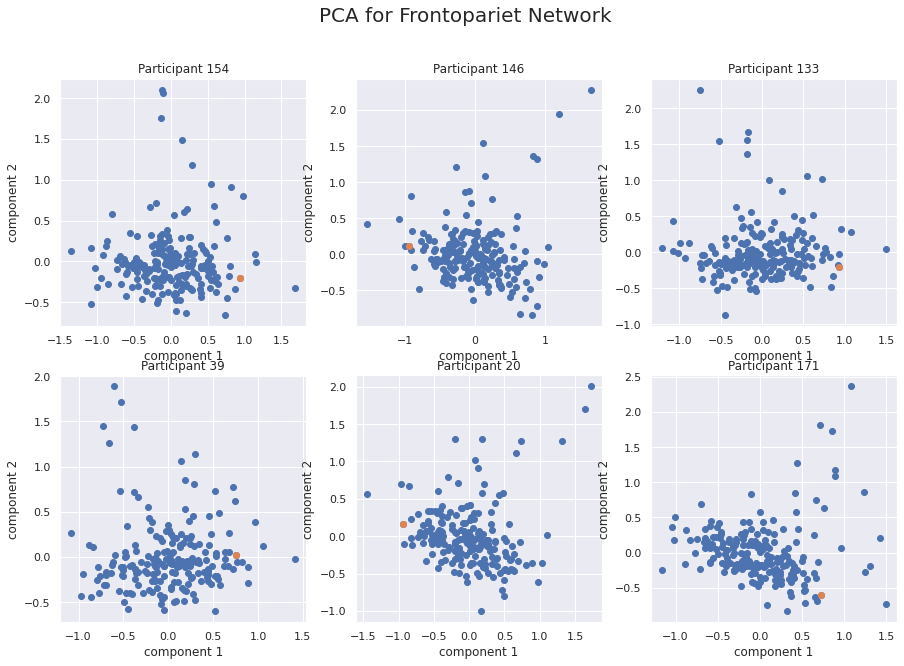

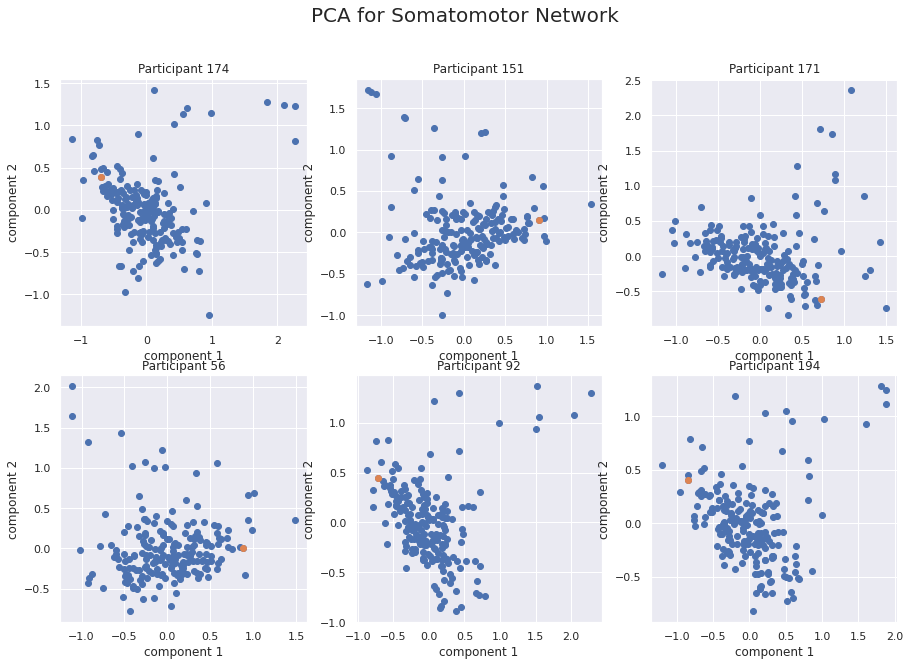

In [ ]:
from sklearn.decomposition import PCA
#PCA function
def pca_corr_matrix(corr_matrix, sub):
  pca = sklearn.decomposition.PCA(2)  # project from 64 to 2 dimensions
  projected = pca.fit_transform(corr_matrix[sub].T)
  plt.scatter(projected[:, 0], projected[:, 1])
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  plt.title('Participant ' + str(sub))
  print(pca.explained_variance_ratio_)
  plt.scatter(*projected[0])


fig = plt.figure(figsize=(15,10))
fig.suptitle('PCA for Frontopariet Network', fontsize=20)
for a in range(1, 7):
  plt.subplot(2, 3, a)
  i = np.random.choice(len(corr_matrix_fp))
  pca_corr_matrix(corr_matrix_fp, i)

fig1 = plt.figure(figsize=(15,10))
fig1.suptitle('PCA for Somatomotor Network', fontsize=20)
for a in range(1, 7):
  plt.subplot(2, 3, a)
  i = np.random.choice(len(corr_matrix_som))
  pca_corr_matrix(corr_matrix_fp, i)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


[Text(1, 0.5, 'L_13l'),
 Text(1, 1.5, 'L_OFC'),
 Text(1, 2.5, 'R_11l'),
 Text(1, 3.5, 'R_a47r'),
 Text(1, 4.5, 'R_p10p'),
 Text(1, 5.5, 'R_a9-46v'),
 Text(1, 6.5, 'R_p47r'),
 Text(1, 7.5, 'L_11l'),
 Text(1, 8.5, 'L_a10p'),
 Text(1, 9.5, 'L_p10p'),
 Text(1, 10.5, 'L_a47r'),
 Text(1, 11.5, 'L_8BM'),
 Text(1, 12.5, 'L_p47r'),
 Text(1, 13.5, 'L_p9-46v'),
 Text(1, 14.5, 'L_a9-46v'),
 Text(1, 15.5, 'R_p9-46v'),
 Text(1, 16.5, 'R_PFm'),
 Text(1, 17.5, 'R_POS2'),
 Text(1, 18.5, 'L_POS2'),
 Text(1, 19.5, 'R_IP2'),
 Text(1, 20.5, 'R_IP1'),
 Text(1, 21.5, 'L_IP1'),
 Text(1, 22.5, 'L_IP2'),
 Text(1, 23.5, 'L_PFm'),
 Text(1, 24.5, 'R_8C'),
 Text(1, 25.5, 'L_8C'),
 Text(1, 26.5, 'L_d32'),
 Text(1, 27.5, 'R_7Pm'),
 Text(1, 28.5, 'L_7Pm'),
 Text(1, 29.5, 'R_TE1p'),
 Text(1, 30.5, 'L_TE1p'),
 Text(1, 31.5, 'R_8BM'),
 Text(1, 32.5, 'L_i6-8'),
 Text(1, 33.5, 'R_i6-8'),
 Text(1, 34.5, 'R_s6-8'),
 Text(1, 35.5, 'R_IFSa'),
 Text(1, 36.5, 'R_AVI'),
 Text(1, 37.5, 'L_AVI'),
 Text(1, 38.5, 'R_IFJp'),
 Text(1, 

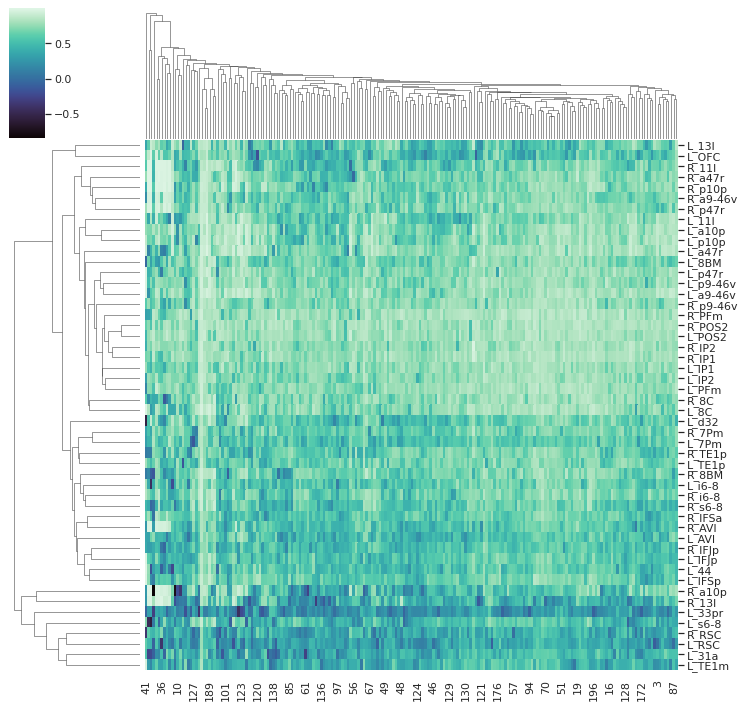

In [ ]:
#Clustering 
import seaborn as sns; sns.set_theme(color_codes=True)

h = sns.clustermap(corr_matrix_fp[0], cmap= 'mako', yticklabels = True)
a = h.ax_heatmap.get_yticklabels()
a = [int(label.get_text()) for label in a]
h.ax_heatmap.set_yticklabels(regions[0][regions[1] == 'Frontopariet'][a])


[Text(1, 0.5, 'R_3b'),
 Text(1, 1.5, 'R_4'),
 Text(1, 2.5, 'L_3b'),
 Text(1, 3.5, 'L_1'),
 Text(1, 4.5, 'L_2'),
 Text(1, 5.5, 'L_4'),
 Text(1, 6.5, 'R_3a'),
 Text(1, 7.5, 'L_3a'),
 Text(1, 8.5, 'R_1'),
 Text(1, 9.5, 'R_2'),
 Text(1, 10.5, 'L_5m'),
 Text(1, 11.5, 'L_7PC'),
 Text(1, 12.5, 'L_7AL'),
 Text(1, 13.5, 'R_7AL'),
 Text(1, 14.5, 'R_7PC'),
 Text(1, 15.5, 'L_5L'),
 Text(1, 16.5, 'R_5m'),
 Text(1, 17.5, 'R_5L'),
 Text(1, 18.5, 'R_6d'),
 Text(1, 19.5, 'L_6d'),
 Text(1, 20.5, 'R_6mp'),
 Text(1, 21.5, 'L_6mp'),
 Text(1, 22.5, 'L_24dv'),
 Text(1, 23.5, 'L_OP2-3'),
 Text(1, 24.5, 'L_RI'),
 Text(1, 25.5, 'R_OP4'),
 Text(1, 26.5, 'L_OP4'),
 Text(1, 27.5, 'L_OP1'),
 Text(1, 28.5, 'L_24dd'),
 Text(1, 29.5, 'R_24dd'),
 Text(1, 30.5, 'R_24dv'),
 Text(1, 31.5, 'L_6v'),
 Text(1, 32.5, 'R_6v'),
 Text(1, 33.5, 'L_FOP2'),
 Text(1, 34.5, 'L_Ig'),
 Text(1, 35.5, 'R_FOP2'),
 Text(1, 36.5, 'R_Ig'),
 Text(1, 37.5, 'R_OP1'),
 Text(1, 38.5, 'R_OP2-3')]

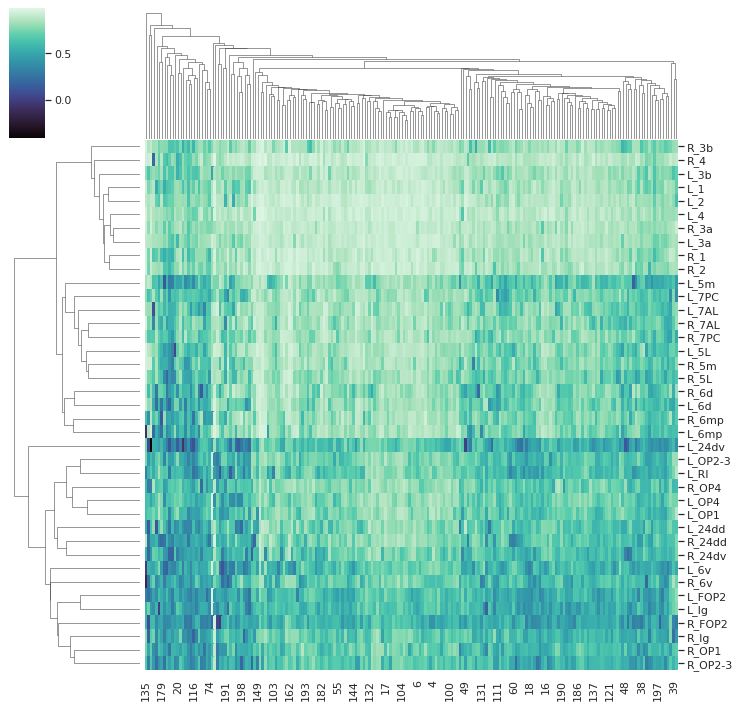

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)


h = sns.clustermap(corr_matrix_som[0], cmap= 'mako', yticklabels = True)
a = h.ax_heatmap.get_yticklabels()
a = [int(label.get_text()) for label in a]
h.ax_heatmap.set_yticklabels(regions[0][regions[1] == 'Somatomotor'][a])

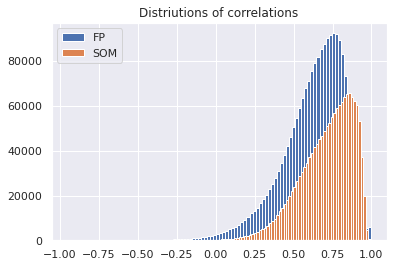


Skewness for FP :  -1.1221211008908707

Kurtosis for FP :  1.9828680125711307

Skewness for SOM :  -0.9190388110367361

Kurtosis for SOM :  0.8560391849572051


In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis
#Grand flattening (taking everything into account)
corr_matrix_fp_flatten = corr_matrix_fp.flatten()
corr_matrix_som_flatten = corr_matrix_som.flatten()

plt.figure()
#plt.axvline(corr_matrix_fp_flatten.mean(), color='r', linewidth=2)
#plt.axvline(corr_matrix_som_flatten.mean(), color='k',  linewidth=2)
plt.hist(corr_matrix_fp_flatten, bins = 100)
plt.hist(corr_matrix_som_flatten, bins = 100)


plt.title("Distriutions of correlations") #We might need to revisit
labels = ['FP', 'SOM']
plt.legend(labels)
plt.show()
print('\nSkewness for FP : ', skew(corr_matrix_fp_flatten)) #Moderately skewed
print('\nKurtosis for FP : ',kurtosis(corr_matrix_fp_flatten))

print('\nSkewness for SOM : ', skew(corr_matrix_som_flatten)) #Highly skewed
print('\nKurtosis for SOM : ',kurtosis(corr_matrix_som_flatten))# #Data sets with low kurtosis tend to have light tails and less outliers

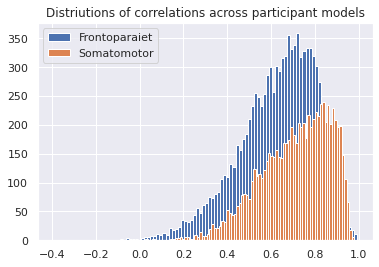

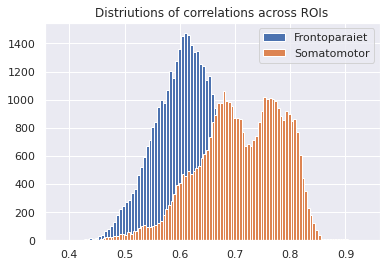

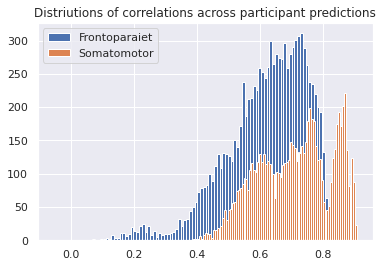

In [ ]:
ROI_participants_fp = corr_matrix_fp.mean(axis=0) #ROIs x Participants
Participants_participants_fp = corr_matrix_fp.mean(axis=1) #Participants x Participants
Participants_ROI_fp = corr_matrix_fp.mean(axis=2) #Participants x ROIs

ROI_participants_som = corr_matrix_som.mean(axis=0) #ROIs x Participants
Participants_participants_som = corr_matrix_som.mean(axis=1) #Participants x Participants
Participants_ROI_som = corr_matrix_som.mean(axis=2) #Participants x ROIs


plt.figure()
plt.hist(ROI_participants_fp.flatten(), bins = 100)
plt.hist(ROI_participants_som.flatten(), bins = 100)
plt.title("Distriutions of correlations across participant models") #We might need to revisit
labels = ['Frontoparaiet', 'Somatomotor']
plt.legend(labels)
plt.show()

plt.figure()
plt.hist(Participants_participants_fp.flatten(), bins = 100)
plt.hist(Participants_participants_som.flatten(), bins = 100)
plt.title("Distriutions of correlations across ROIs") #We might need to revisit
labels = ['Frontoparaiet', 'Somatomotor']
plt.legend(labels)
plt.show()

plt.figure()
plt.hist(Participants_ROI_fp.flatten(), bins = 100)
plt.hist(Participants_ROI_som.flatten(), bins = 100)
plt.title("Distriutions of correlations across participant predictions") #We might need to revisit
labels = ['Frontoparaiet', 'Somatomotor']
plt.legend(labels)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'Heat Map for average across Participant (model): FP')

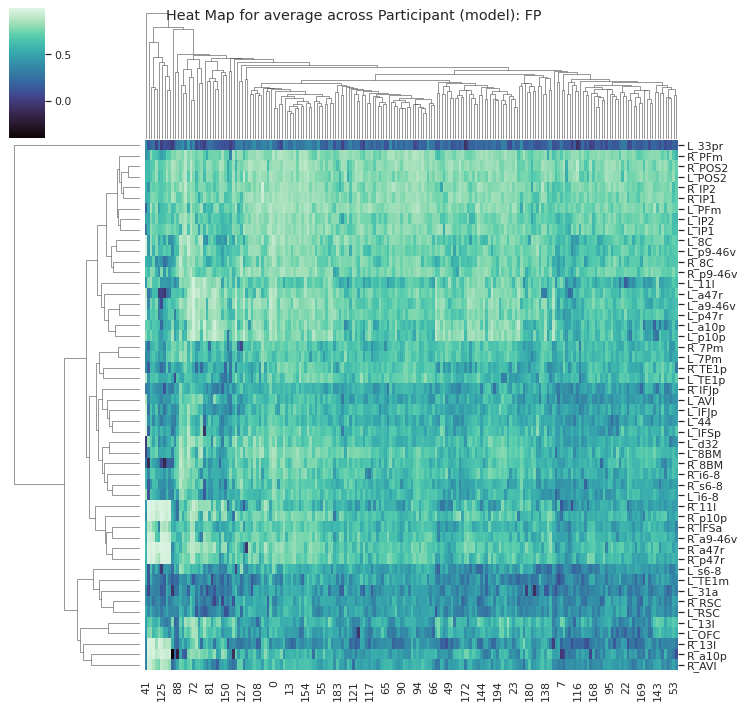

In [ ]:
#Here we have heatmaps for participants (tested model) x ROIs 
#Here we are exploring how transferable are models for specific ROIs on participants.
import seaborn as sns; sns.set_theme(color_codes=True)
h = sns.clustermap(ROI_participants_fp, cmap= 'mako', yticklabels = True)
a = h.ax_heatmap.get_yticklabels()
a = [int(label.get_text()) for label in a]
h.ax_heatmap.set_yticklabels(regions[0][regions[1] == 'Frontopariet'][a])
h.fig.suptitle('Heat Map for average across Participant (model): FP') 




 




Text(0.5, 0.98, 'Heat Map for average across Participant (model): SOM')

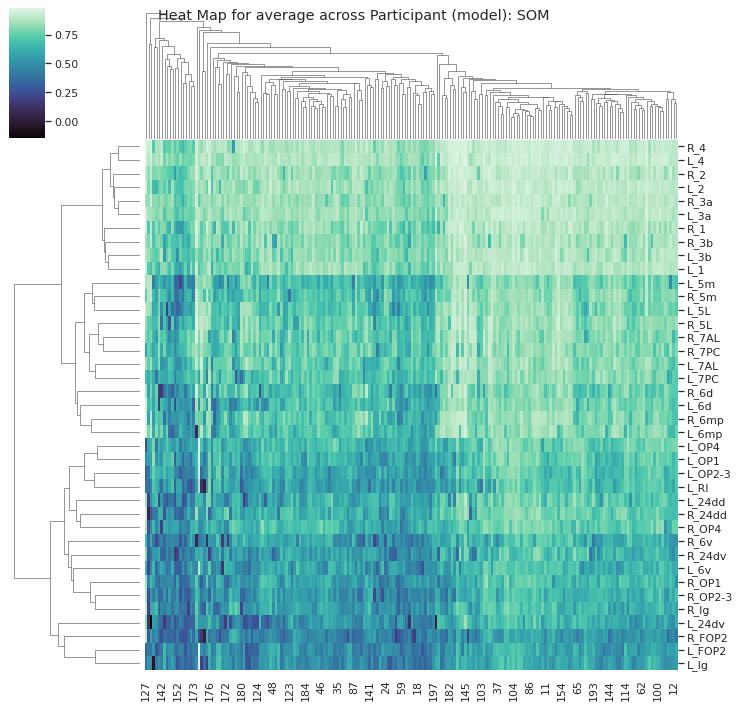

In [ ]:
h = sns.clustermap(ROI_participants_som, cmap= 'mako', yticklabels = True)
a = h.ax_heatmap.get_yticklabels()
a = [int(label.get_text()) for label in a]
h.ax_heatmap.set_yticklabels(regions[0][regions[1] == 'Somatomotor'][a])
h.fig.suptitle('Heat Map for average across Participant (model): SOM')

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'Heat Map for average over ROIs (model): FP')

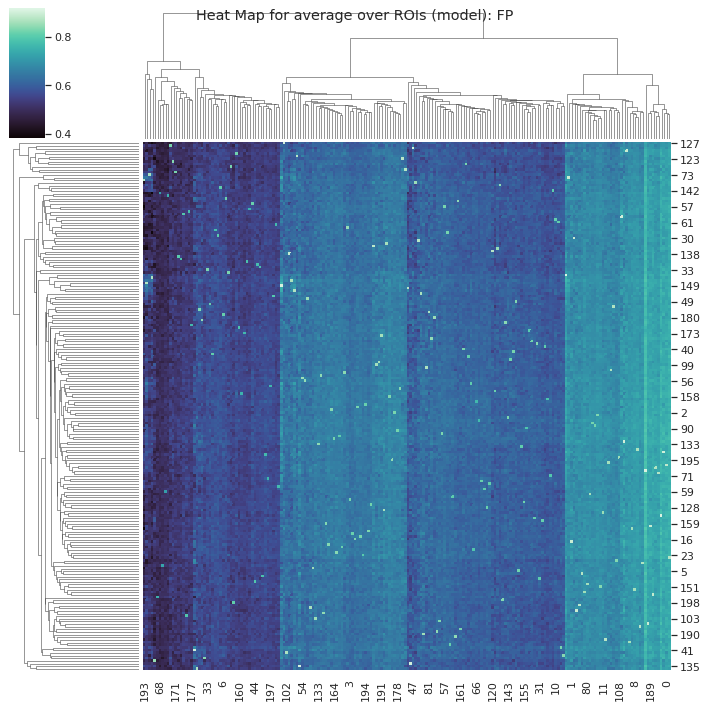

In [ ]:
#Here we have cluster maps for participants (trained model) x participants (tested model). 
#Here we are exploring transferability of the trained models. 

h = sns.clustermap(Participants_participants_fp, cmap= 'mako')
h.fig.suptitle('Heat Map for average over ROIs (model): FP') 



/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'Heat Map for average over ROIs (model): SOM')

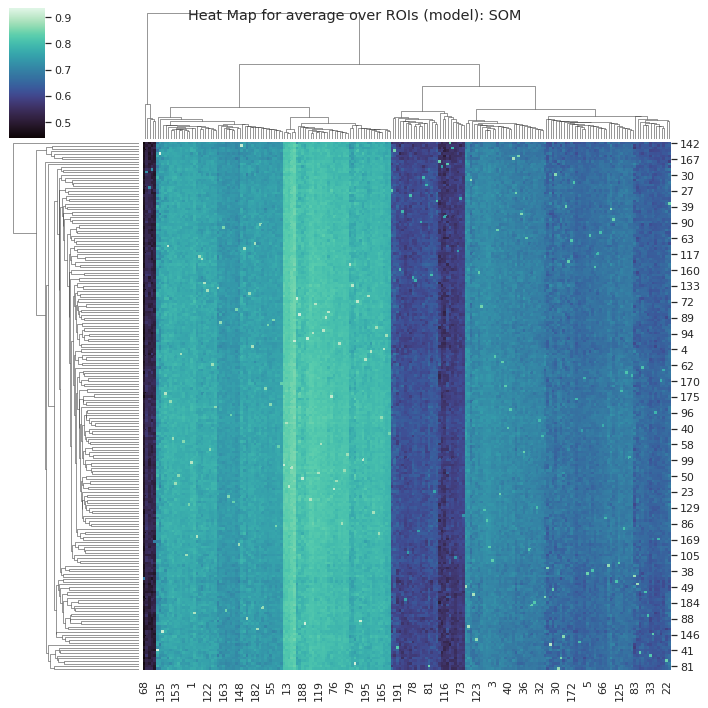

In [ ]:
h = sns.clustermap(Participants_participants_som, cmap= 'mako')
h.fig.suptitle('Heat Map for average over ROIs (model): SOM') 

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


[Text(0.5, 0, 'R_POS2'),
 Text(2.5, 0, 'L_PFm'),
 Text(4.5, 0, 'R_IP1'),
 Text(6.5, 0, 'L_IP1'),
 Text(8.5, 0, 'L_IP2'),
 Text(10.5, 0, 'R_p10p'),
 Text(12.5, 0, 'R_a9-46v'),
 Text(14.5, 0, 'L_a10p'),
 Text(16.5, 0, 'L_a47r'),
 Text(18.5, 0, 'L_p47r'),
 Text(20.5, 0, 'L_a9-46v'),
 Text(22.5, 0, 'L_8C'),
 Text(24.5, 0, 'L_TE1p'),
 Text(26.5, 0, 'R_7Pm'),
 Text(28.5, 0, 'R_IFSa'),
 Text(30.5, 0, 'R_8BM'),
 Text(32.5, 0, 'R_11l'),
 Text(34.5, 0, 'L_44'),
 Text(36.5, 0, 'R_s6-8'),
 Text(38.5, 0, 'L_OFC'),
 Text(40.5, 0, 'R_IFJp'),
 Text(42.5, 0, 'L_AVI'),
 Text(44.5, 0, 'L_31a'),
 Text(46.5, 0, 'R_13l'),
 Text(48.5, 0, 'R_RSC')]

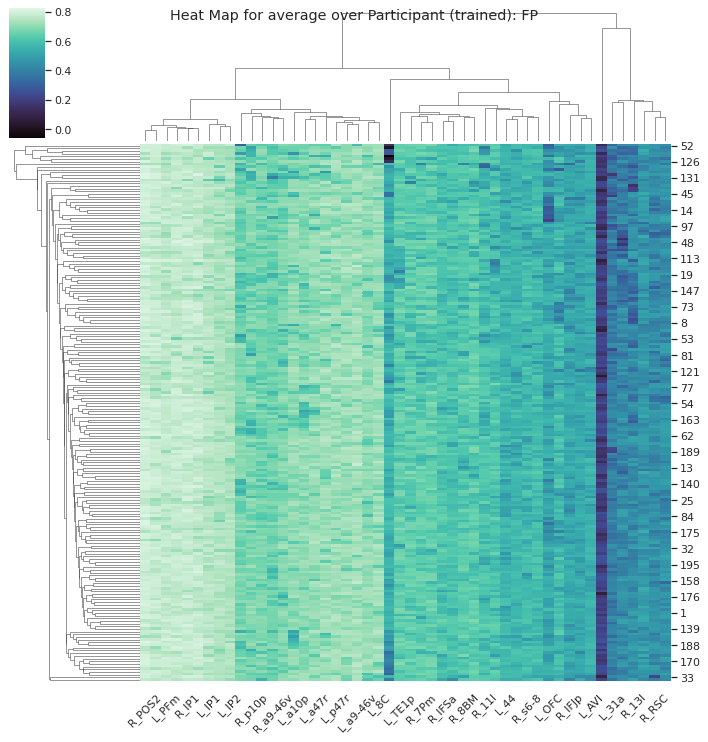

In [ ]:
#Here we have cluster maps for participants (trained model) x participants (tested model).
#This is indicative of wheteher different ROIs have different effect on training data 
h = sns.clustermap(Participants_ROI_fp, cmap= 'mako')
h.fig.suptitle('Heat Map for average over Participant (trained): FP')
a = h.ax_heatmap.get_xticklabels()
a = [int(label.get_text()) for label in a]
h.ax_heatmap.set_xticklabels(regions[0][regions[1] == 'Frontopariet'][a], rotation=45)





[Text(0.5, 0, 'L_RI'),
 Text(2.5, 0, 'R_6v'),
 Text(4.5, 0, 'L_6v'),
 Text(6.5, 0, 'R_Ig'),
 Text(8.5, 0, 'L_24dv'),
 Text(10.5, 0, 'L_Ig'),
 Text(12.5, 0, 'L_3b'),
 Text(14.5, 0, 'L_1'),
 Text(16.5, 0, 'L_4'),
 Text(18.5, 0, 'R_2'),
 Text(20.5, 0, 'L_3a'),
 Text(22.5, 0, 'R_7PC'),
 Text(24.5, 0, 'R_7AL'),
 Text(26.5, 0, 'L_6mp'),
 Text(28.5, 0, 'L_5L'),
 Text(30.5, 0, 'L_24dd'),
 Text(32.5, 0, 'R_6d'),
 Text(34.5, 0, 'L_6d'),
 Text(36.5, 0, 'L_OP4'),
 Text(38.5, 0, 'L_OP1')]

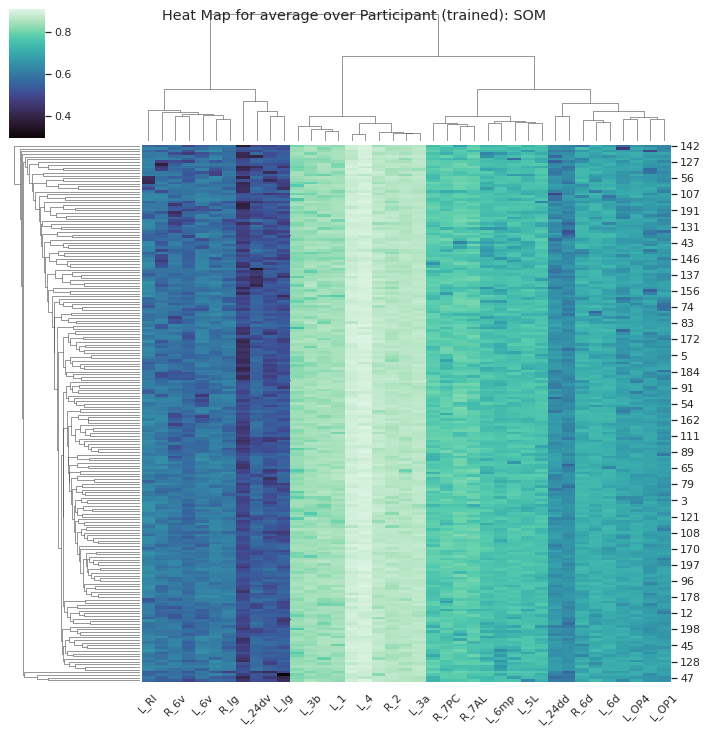

In [ ]:
h = sns.clustermap(Participants_ROI_som, cmap= 'mako')
h.fig.suptitle('Heat Map for average over Participant (trained): SOM')
a = h.ax_heatmap.get_xticklabels()
a = [int(label.get_text()) for label in a]
h.ax_heatmap.set_xticklabels(regions[0][regions[1] == 'Somatomotor'][a], rotation=45)